In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['svg.fonttype'] = 'none'
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['axes.linewidth'] = 1
import glob

files = np.sort(glob.glob("bins_annotations/*.txt"));
genes_long = ['Respiratory nitrate reductase gamma chain (EC 1.7.99.4)','Periplasmic nitrate reductase (EC 1.7.99.4)','Nitrite reductase (EC 1.7.2.1)','Copper-containing nitrite reductase (EC 1.7.2.1)','Nitric-oxide reductase subunit B (EC 1.7.99.7)','Nitrous-oxide reductase (EC 1.7.99.6)']

genes = ['narG','napA','nirS','nirK','norB','nosZ']
def plotGMatrix(G):
    cols = list(G.columns)
    rows = list(G.index)
    
    G = G.values.copy()
    
    lines_cmap = np.array([[1.000,1.000,1.000],
                           [0.000,0.447,0.741],
                           [0.850,0.325,0.098],
                           [0.929,0.694,0.125],
                           [0.466,0.674,0.188],
                           [0.301,0.745,0.933],
                           [0.635,0.078,0.184]])
    N = G.shape[0]
    M = G.shape[1]
    
    G[G>0.0] = 1.0 #binarize
#     G[:,0:9]  = G[:,0:9]*1;
#     G[:,9:11]  = G[:,9:11]*2;
#     G[:,11:13]  = G[:,11:13]*3;
#     G[:,  13]  = G[:,  13]*4;
    G[:,0]  = G[:,0]*1;
    G[:,1]  = G[:,1]*5;
    G[:,2]  = G[:,2]*2;
    G[:,3]  = G[:,3]*6;
    G[:,4]  = G[:,4]*3;
    G[:,5]  = G[:,5]*4;
    
    plt.figure(figsize=(8, 6), dpi=80)
    Gplot = np.zeros((N,M,3))
    for i in range(0,N):
        for j in range(0,M):
            Gplot[i,j,0] = lines_cmap[int(G[i,j]),0]
            Gplot[i,j,1] = lines_cmap[int(G[i,j]),1]
            Gplot[i,j,2] = lines_cmap[int(G[i,j]),2]
    plt.imshow(Gplot,alpha=1)
#     plt.xticks(range(0,M),cols,rotation=45)
#     plt.yticks(range(0,N),rows)
    
    ax = plt.gca()
    ax.set_xticks(range(0,M),minor=False)
    ax.set_xticks(np.linspace(0,M,M+1)-0.5,minor=True)    
    ax.set_xticklabels(cols,rotation=45,ha='right',minor=False)
    #     ax.xaxis.tick_top()
    
    ax.set_yticks(range(0,N),minor=False)
    ax.set_yticks(np.linspace(0,N,N+1)-0.5,minor=True)  
    ax.set_yticklabels(rows)

    
    ax.grid(which='minor',color='w', linestyle='-', linewidth=4)
    ax.grid(which='major',color='grey', linestyle=':', linewidth=1,alpha=0.5)

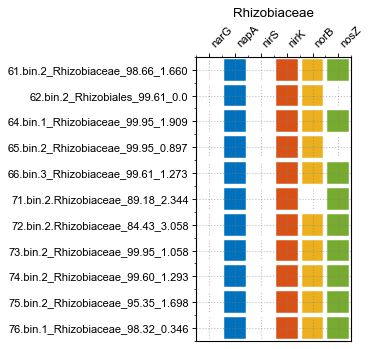

In [2]:
genotypes = pd.DataFrame(columns = genes)

for file in files:
    folder = file[0:16]
    filename = file[17:-4]
    if file.find('Rhizo') > 1:
        genotypes = genotypes.append(pd.Series(name=filename,dtype='float64')).fillna(0)
        anno = pd.read_csv(file,sep='\t',header=0)

        for i in range(0,len(genes)):
            if genes_long[i] in list(anno['function']):
                genotypes[genes[i]][filename] = 1
            
plotGMatrix(genotypes);
plt.title('Rhizobiaceae');
fig = plt.gcf()
fig.set_figwidth(2.5)

r_genotypes = genotypes.copy()

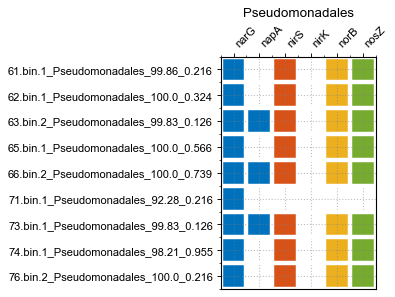

In [3]:
genotypes = pd.DataFrame(columns = genes)

for file in files:
    folder = file[0:16]
    filename = file[17:-4]
    if file.find('Pseud') > 1:
        genotypes = genotypes.append(pd.Series(name=filename,dtype='float64')).fillna(0)
        anno = pd.read_csv(file,sep='\t',header=0)

        for i in range(0,len(genes)):
            if genes_long[i] in list(anno['function']):
                genotypes[genes[i]][filename] = 1
        
plotGMatrix(genotypes);
plt.title('Pseudomonadales');
fig = plt.gcf()
genes_long = ['Respiratory nitrate reductase gamma chain (EC 1.7.99.4)','Periplasmic nitrate reductase (EC 1.7.99.4)','Nitrite reductase (EC 1.7.2.1)','Copper-containing nitrite reductase (EC 1.7.2.1)','Nitric-oxide reductase subunit B (EC 1.7.99.7)','Nitric-oxide reductase (EC 1.7.99.7), quinol-dependent','Nitrous-oxide reductase (EC 1.7.99.6)']
fig.set_figwidth(2.5)

p_genotypes = genotypes.copy()

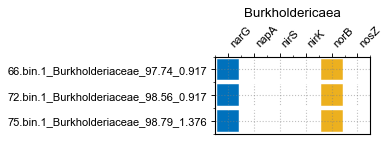

In [18]:
genes_long = ['Respiratory nitrate reductase gamma chain (EC 1.7.99.4)','Periplasmic nitrate reductase (EC 1.7.99.4)','Nitrite reductase (EC 1.7.2.1)','Copper-containing nitrite reductase (EC 1.7.2.1)','Nitric-oxide reductase (EC 1.7.99.7), quinol-dependent','Nitrous-oxide reductase (EC 1.7.99.6)']

genotypes = pd.DataFrame(columns = genes)

for file in files:
    folder = file[0:16]
    filename = file[17:-4]
    if filename.find('Burkh') > 1:
        genotypes = genotypes.append(pd.Series(name=filename,dtype='float64')).fillna(0)
        anno = pd.read_csv(file,sep='\t',header=0)

        for i in range(0,len(genes)):
            if genes_long[i] in list(anno['function']):
                genotypes[genes[i]][filename] = 1
                        
plotGMatrix(genotypes);
plt.title('Burkholdericaea');
fig = plt.gcf()
fig.set_figwidth(2.5)

b_genotypes = genotypes.copy()

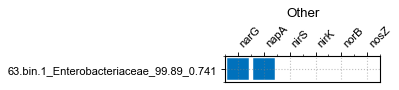

In [20]:
genes_long = ['Respiratory nitrate reductase gamma chain (EC 1.7.99.4)','Periplasmic nitrate reductase (EC 1.7.99.4)','Nitrite reductase (EC 1.7.2.1)','Copper-containing nitrite reductase (EC 1.7.2.1)','Nitric-oxide reductase (EC 1.7.99.7), quinol-dependent','Nitrous-oxide reductase (EC 1.7.99.6)']

genotypes = pd.DataFrame(columns = genes)

for file in files:
    folder = file[0:16]
    filename = file[17:-4]
    if filename.find('Entero') > 1:
        genotypes = genotypes.append(pd.Series(name=filename,dtype='float64')).fillna(0)
        anno = pd.read_csv(file,sep='\t',header=0)

        for i in range(0,len(genes)):
            if genes_long[i] in list(anno['function']):
                genotypes[genes[i]][filename] = 1
                        
plotGMatrix(genotypes);
plt.title('Other');
fig = plt.gcf()
fig.set_figwidth(2.5)

e_genotypes = genotypes.copy()

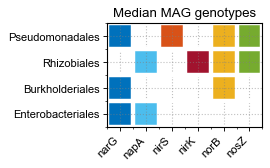

In [50]:
median_genotypes = pd.concat([p_genotypes.median(axis=0).rename('Pseudomonadales'),r_genotypes.median(axis=0).rename('Rhizobiales'),b_genotypes.median(axis=0).rename('Burkholderiales'),e_genotypes.median(axis=0).rename('Enterobacteriales')],axis=1).T

plotGMatrix(median_genotypes);
plt.title('Median MAG genotypes');
fig = plt.gcf()
fig.set_figwidth(2.5)
plt.savefig('Fig2_median_genotypes.svg')